# Статистический анализ данных, проверка гипотез

## Описание проекта

Сервис аренды самокатов GoFast передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно проверить несколько гипотез.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей.      
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.
    
**Цель исследования** - проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.

**Задачи исследования:**

* описать и визуализировать общую информацию о пользователях и поездках;
* сравнить поведение пользователей с подпиской и без подписки;
* подсчитать помесячную выручку с каждого пользователя;
* проверить гипотезы.

**Ход исследования:**

В первую очередь изучим общую информацию о датафреймах, проверим данные на наличие пропусков и дубликатов, обработаем их, если такие значения присутствуют. Преобразуем столбец `date` в нужный тип datetime. Далее проведём исследовательский анализ данных: рассмотрим соотношение пользователей с подпиской и без, возраст пользователей, частоту встречаемости городов, расстояние и продолжительность поездок. Построим графики распределения для обозначенных параметров по двум категориям пользователей. Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. В основной части исследования проверим следующие гипотезы:

* Продолжительность поездки (duration) пользователей с подпиской "Ультра" равна продолжительности поездки (duration) пользователей без подписки;
* Среднее расстояние одной поездки (distance) пользователей с подпиской "Ультра" = 3130 метров;
* Помесячная выручка (month_revenue) от пользователей с подпиской "Ультра" равна помесячной выручке (month_revenue) пользователей без подписки.

## Изучение файлов с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt
# импорт библиотек pandas, seaborn, matplotlib.pyplot, numpy, stats
%config InlineBackend.figure_format='svg'
import warnings
warnings.filterwarnings('ignore')
# опции отображения данных

In [2]:
users_df = pd.read_csv('/Users/polzovatel/Desktop/Проекты Яндекс доработка/Go Fast/users_go.csv')
rides_df = pd.read_csv('/Users/polzovatel/Desktop/Проекты Яндекс доработка/Go Fast/rides_go.csv')
subscriptions_df = pd.read_csv('/Users/polzovatel/Desktop/Проекты Яндекс доработка/Go Fast/subscriptions_go.csv')
# чтение файлов с данными и сохранение в переменные

In [3]:
def get_df_info(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
# создание функции для вывода характеристик датафреймов

In [4]:
df_dict = {'users_df': users_df, 'rides_df': rides_df, 'subscriptions_df': subscriptions_df}
for name, df in df_dict.items():
    print(f'Вывод характеристик для датафрейма: {name}')
    get_df_info(df)
# вывод характеристик датафреймов с помощью цикла

Вывод характеристик для датафрейма: users_df


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Вывод характеристик для датафрейма: rides_df


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Вывод характеристик для датафрейма: subscriptions_df


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Данные в столбце `date` датафрейма rides_df представлены типом object, нужно перевести их в тип datetime для корректной работы с датами. 

Подробнее рассмотрим столбцы `distance` и `duration` для исследования аномальных значений. Например, минимальное расстояние, которое пользователь проехал за сессию составляет *0.85 метров*, а минимальная длительность сессии - *0.5 минут*. Также рассчитаем скорость поездок и выделим аномалии.
 
Далее проверим датафреймы на наличие явных и неявных дубликатов.

**Вывод:**

В каждой строке датафрейма users_df - данные о пользователях сервиса GoFast: имя, возраст, город, тип подписки. rides_df содержит информацию о поездках, включая дату, продолжительность сессии в минутах и расстояние в метрах. Основная информация по тарифам и условиям представлена в таблице subscriptions_df.

В датафреймах есть значения с некорректным типом, а также аномалии в нескольких колонках.

В первую очередь устраним проблемы в данных.

## Предобработка данных

### Удаление дубликатов

In [5]:
df_dict = {'users_df': users_df, 'rides_df': rides_df, 'subscriptions_df': subscriptions_df}
for name, df in df_dict.items():
    print(f'Число явных дубликатов в датафрейме {name}:')
    print(df.duplicated().sum())
# подсчёт явных дубликатов

Число явных дубликатов в датафрейме users_df:
31
Число явных дубликатов в датафрейме rides_df:
0
Число явных дубликатов в датафрейме subscriptions_df:
0


In [6]:
users_df_origin = users_df.copy()
# копия 'сырых' данных

In [7]:
users_df[users_df[list(users_df.columns)].duplicated()]
# подсчёт явных дубликатов

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Удалим явные дубликаты в датафрейме users_df. Похоже, некоторых пользователей внесли в базу данных несколько раз.

In [8]:
users_df = users_df.drop_duplicates()
# удаление явных дубликатов

In [9]:
print('В результате удаления дубликатов в датасете users_df осталось {:.0%} от первоначальных данных.'.format(users_df.shape[0] / users_df_origin.shape[0]))

В результате удаления дубликатов в датасете users_df осталось 98% от первоначальных данных.


In [10]:
users_df.info()
# проверка общей информации о данных в таблице users_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [11]:
users_df['city'].unique()
# уникальные значения в колонке 'city'

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [12]:
users_df['subscription_type'].unique()
# уникальные значения в колонке 'subscription_type'

array(['ultra', 'free'], dtype=object)

### Заполнение пропусков

In [13]:
df_dict = {'users_df': users_df, 'rides_df': rides_df, 'subscriptions_df': subscriptions_df}
for name, df in df_dict.items():
    print(f'Число пропусков в датафрейме {name}:')
    print(df.isna().sum())
# подсчёт пропусков

Число пропусков в датафрейме users_df:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
Число пропусков в датафрейме rides_df:
user_id     0
distance    0
duration    0
date        0
dtype: int64
Число пропусков в датафрейме subscriptions_df:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропусков в данных нет.

### Изменение типов данных

In [14]:
rides_df.dtypes
# типы данных датафрейма rides_df

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [15]:
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%dT%H:%M:%S')
# перевод дат в тип datetime

In [16]:
rides_df.dtypes
# проверка типов данных датафрейма rides_df

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

## Добавление новых столбцов

Посмотрим, за какой период у нас имеются данные.

In [17]:
print(f'В выборке представлены данные с {rides_df["date"].min()} по {rides_df["date"].max()}')

В выборке представлены данные с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


У нас есть данные по поездкам только за один год, поэтому мы можем создать новый столбец с номером месяца без учёта года.

In [18]:
rides_df['month'] = pd.DatetimeIndex(rides_df['date']).month
# создание нового столбца с номером месяца

In [19]:
rides_df.head()
# вывод первых 5 строк

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Вывод

На этапе предобработки были *удалены явные дубликаты*: 31 строка с данными о пользователях датафрейма users_df. Возможно, одних и тех же клиентов внесли в базу данных несколько раз.

Далее мы проверили данные на наличие пропусков. Пропусков в данных *не обнаружилось*.

Также был изменён тип данных из столбца date датафрейма rides_df на *тип datetime64* для правильной интерпретации дат в ходе анализа.

В конце этапа предобработки мы добавили новую колонку с *номером месяца* для каждой сессии.

## Исследовательский анализ данных

### Частота встречаемости городов

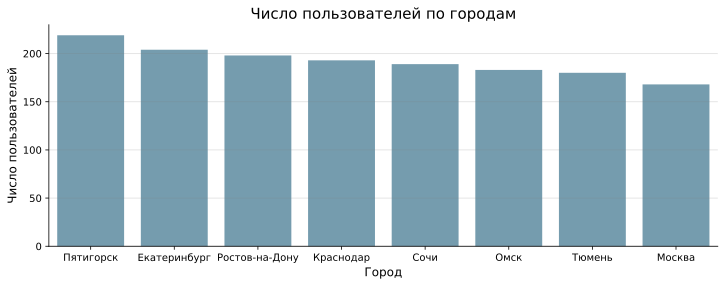

In [20]:
matplotlib.rcParams['font.family'] = 'sans-serif'
# настройка шрифта
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
# удаление линий осей
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.alpha'] = 0.2
# настройка параметров сетки графиков

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
ax1.set_title(f'Число пользователей по городам', fontsize=15)
sns.barplot(data=users_df['city'].value_counts().reset_index(), 
            x='index', 
            y='city', 
            color='#6B9FB8', 
            ax=ax1)

plt.xlabel("Город", fontsize=12)
plt.ylabel("Число пользователей", fontsize=12)
plt.show()
# построение столбчатой диараммы

Больше всего пользователей зарегистрировано в **Пятигорске и Екатеринбурге**: *219 и 204* человека соответственно. На последнем месте - **Москва** (*168* человек). Такое распределение числа пользователей сервиса может быть характерно для конкретной выборки, так как разброс значений по городам небольшой. Также можно предположить, что в Тюмени и Москве GoFast появился позже, чем в других городах.

In [21]:
users_city_subscription = users_df.pivot_table(index='city', columns='subscription_type', values='user_id', aggfunc='count').reset_index()
users_city_subscription['ultra_share'] = round(users_city_subscription['ultra'] / (users_city_subscription['free'] + users_city_subscription['ultra']), 2)
users_city_subscription
# группировка по городам и типу подписки с подсчётом числа клиентов и доли пользователей с подпиской

subscription_type,city,free,ultra,ultra_share
0,Екатеринбург,112,92,0.45
1,Краснодар,112,81,0.42
2,Москва,84,84,0.50
3,Омск,92,91,0.50
4,Пятигорск,125,94,0.43
5,Ростов-на-Дону,109,89,0.45
6,Сочи,103,86,0.46
7,Тюмень,98,82,0.46


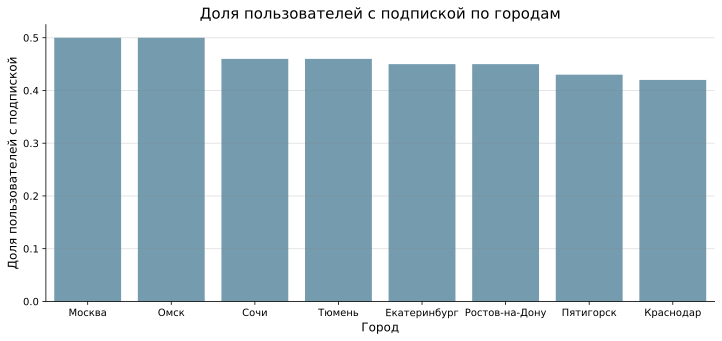

In [22]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
ax1.set_title(f'Доля пользователей с подпиской по городам', fontsize=15)
sns.barplot(data=users_city_subscription.sort_values(by='ultra_share', ascending=False), 
            x='city', 
            y='ultra_share', 
            palette=['#6B9FB8'], 
            ax=ax1)

plt.xlabel("Город", fontsize=12)
plt.ylabel("Доля пользователей с подпиской", fontsize=12)
plt.show()
# построение столбчатой диараммы

Лидерами по доле пользователей с подпиской являются **Москва и Омск** (*50%* оформили подписку ultra). В этих городах людям выгоднее приобретать подписку и чаще пользоваться услугами кикшеринга из-за большой загруженности дорог, а также благодаря развитой инфраструктуре: наличию велопарковок, велодорожек и хорошей освещённости дорог в тёмное время суток. Меньше всего клиентов с подпиской проживают в **Краснодаре** (*42%*).

### Соотношение пользователей с подпиской и без подписки

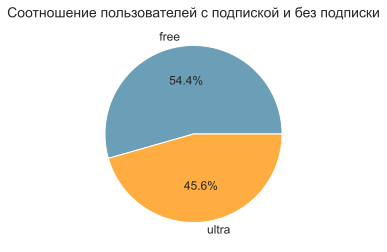

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 4))
plt.pie(data=users_df['subscription_type'].value_counts().reset_index(), 
        labels='index', 
        x='subscription_type',  
        autopct='%1.1f%%',
        colors=['#6B9FB8', '#FFAC40'],
        textprops={'fontsize':12}
       )

plt.title('Соотношение пользователей с подпиской и без подписки', fontsize=14)
plt.show()
# построение круговой диараммы

Всего пользователей **с подпиской** в нашей выборке *45.6%*, **без подписки** - *54.4%*.

### Возраст пользователей

In [24]:
def plot_hist(data, column, column_name, x_range=(0, 100), number_of_bins=15, xlab='Возраст'):
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
    ax1.set_title(f'Распределение параметра: {column_name}', fontsize=14)
    sns.histplot(x=column, data=data, ax=ax1, color='#FFAC40', bins=number_of_bins).set(xlim=x_range)
    
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.show()
# создание функции для вывода гистограмм распределения разных параметров 

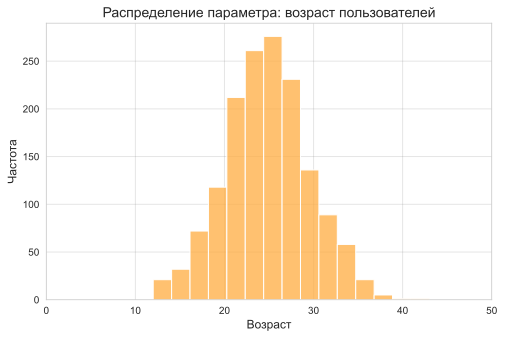

In [25]:
plot_hist(users_df, 'age', 'возраст пользователей', (0, 50))
# вывод гистограммы распределения 

Средний возраст пользователя приложения - 25 лет, а 75% клиентов младше 28 лет. Значит, типичные пользователи нашего сервиса - **молодые люди** от *18 до 28* лет. Есть и одиночные выбросы: подростки 12 лет и взрослые люди старше 37 лет.

In [26]:
users_df[users_df['age'] < 15]
# срез данных

,user_id,name,age,city,subscription_type
20,21,Святогор,14,Ростов-на-Дону,ultra
34,35,Руслан,12,Пятигорск,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
83,84,Анна,13,Екатеринбург,ultra
145,146,Ева,14,Ростов-на-Дону,ultra
235,236,Владимир,13,Тюмень,ultra
314,315,Игорь,13,Москва,ultra
448,449,Александр,14,Москва,ultra
553,554,Евгений,13,Тюмень,ultra
664,665,Герман,12,Сочи,ultra


In [27]:
users_df['age'].apply(lambda x: '< 18' if x < 18 else ('>= 18' if x >= 18 else np.nan)).value_counts(dropna=False)
# количество совершеннолетних и несовершеннолетних пользователей

>= 18    1455
< 18       79
Name: age, dtype: int64

Примерно 5% пользователей являются несовершеннолетними.

### Расстояние, которое пользователь преодолел за одну поездку

In [28]:
rides_df['distance'].describe(percentiles=[0.01, 0.05, 0.25])
# получение описательной статистики с расчётом перцентилей

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
1%         208.084405
5%         689.007279
25%       2543.226360
50%       3133.609994
max       7211.007745
Name: distance, dtype: float64

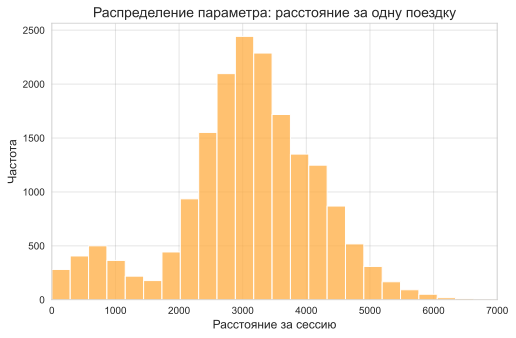

In [29]:
plot_hist(rides_df, 'distance', 'расстояние за одну поездку', (0, 7000), 25, xlab='Расстояние за сессию')
# вывод гистограммы распределения 

В среднем пользователи проезжают на самокатах **3 км**. Есть короткие поездки на расстояние меньше 700 метров, например, в ближайший магазин, школу, поликлинику. Самые длительные поездки начинаются от 5 км. Можно выделить аномальные значения меньше 200 метров. Предположительно, такие поездки являются тренировочными с целью тестирования сервиса.

Посмотрим на поездки со скоростью меньше 3 км./ч. (50 м./мин.)

In [30]:
rides_df[(rides_df['distance'] / rides_df['duration']) < 50]
# срез данных, подсчёт скорости м./мин.

,user_id,distance,duration,date,month
9,1,748.690645,15.041884,2021-11-22,11
149,15,634.891669,15.809350,2021-04-05,4
204,21,517.912395,14.219625,2021-10-01,10
228,24,409.829089,10.294197,2021-04-04,4
397,42,614.716075,12.844148,2021-08-17,8
...,...,...,...,...,...
17990,1530,105.796106,12.244145,2021-01-21,1
18007,1531,450.981518,15.591699,2021-02-14,2
18031,1532,303.787850,7.792490,2021-05-21,5
18043,1533,310.488247,10.642389,2021-02-21,2


За время поездки пользователи могут периодически делать короткие остановки и такая низкая скорость является результатом усреднения показателей в течение пути.

### Продолжительность поездок

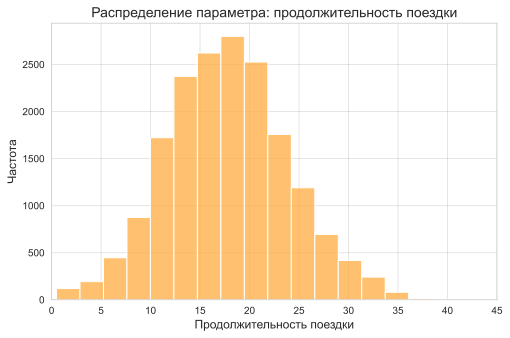

In [31]:
plot_hist(rides_df, 'duration', 'продолжительность поездки', (0, 45), 17, xlab='Продолжительность поездки')
# вывод гистограммы распределения 

**18 мин.** - средняя продолжительность поездки на самокате. Разброс значений небольшой, продолжительность 95% поездок меньше 29 мин. Есть единичные сессии дольше 35 мин.

In [32]:
short_duration_index = list((rides_df[rides_df['duration'] < 1]).index)
# сохранение списка с поездками продолжительностью меньше 1 мин.
rides_df[rides_df['duration'] < 1]
# срез данных 

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Короткие поездки по *0.5 мин.* указывают на аномалии в данных. Необходимо выяснить причину появления таких строк. Предположительно, в этот период проводилась акция с раздачей промокодов на бесплатные минуты.

In [33]:
((rides_df['distance'] / rides_df['duration']).mean(), (rides_df['distance'] / rides_df['duration']).median())
# средняя и медианная скорость поездок

(229.7543524235686, 170.8522494427599)

In [34]:
high_speed_index = list((rides_df[(rides_df['distance'] / rides_df['duration']) > 1670]).index)
# сохранение списка поездок со скоростью более 1670 м./мин.
len(rides_df[(rides_df['distance'] / rides_df['duration']) > 1670])
# подсчёт поездок со скоростью свыше 100 км./ч. 

95

In [35]:
len(set(short_duration_index).intersection(set(high_speed_index)))
# проверка пересечения индексов

95

Множество значений из short_duration_index полностью содержится в множестве high_speed_index. Строки с высокой скоростью - это те же строки с продолжительностью поездок меньше 1 мин.

## Объединение данных

In [36]:
users_and_rides_df = users_df.merge(rides_df, how='left', on='user_id')
# объединение датафреймов users_df и rides_df по столбцу 'user_id'

In [37]:
users_and_rides_df = users_and_rides_df.merge(subscriptions_df, how='left', on='subscription_type')
# объединение датафреймов users_and_rides_df и subscriptions_df по столбцу 'subscription_type'

In [38]:
users_and_rides_df.head()
# вывод первых 5 строк

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [39]:
if rides_df.shape[0] == users_and_rides_df.shape[0]:
    print(f'Число строк в users_and_rides_df: {users_and_rides_df.shape[0]}')
    print(f'Число строк в rides_df: {rides_df.shape[0]}')
    print('Число строк в объединённом датафрейме users_and_rides_df совпадает с количеством записей в rides_df.')
else:
    print(f'Число строк в users_and_rides_df: {users_and_rides_df.shape[0]}')
    print(f'Число строк в rides_df: {rides_df.shape[0]}')
    print('Число строк в объединённом датафрейме users_and_rides_df не совпадает с количеством записей в rides_df.')

Число строк в users_and_rides_df: 18068
Число строк в rides_df: 18068
Число строк в объединённом датафрейме users_and_rides_df совпадает с количеством записей в rides_df.


In [40]:
ultra_users_df = users_and_rides_df.query('subscription_type == "ultra"')
# срез данных по пользователям с подпиской

In [41]:
free_users_df = users_and_rides_df.query('subscription_type == "free"')
# срез данных по пользователям без подписки

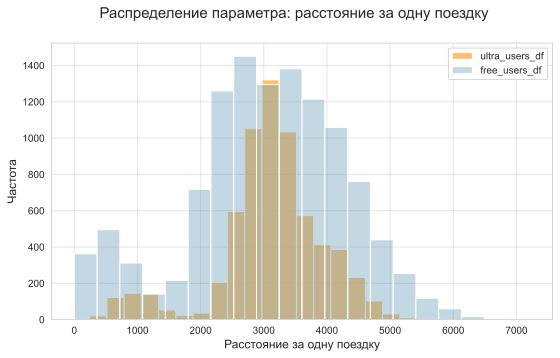

In [42]:
fig = plt.figure(figsize=(9, 5))
fig.suptitle('Распределение параметра: расстояние за одну поездку', fontsize=15)
ax1 = fig.add_subplot(1, 1, 1)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
sns.histplot(x='distance', data=ultra_users_df, ax=ax1, color='#FFAC40', bins=20)
sns.histplot(x='distance', data=free_users_df, ax=ax1, color='#6B9FB8', alpha=0.4, bins=20)

plt.xlabel("Расстояние за одну поездку", fontsize=12)
plt.ylabel("Частота", fontsize=12)
ax1.legend(["ultra_users_df", "free_users_df"])

plt.show()
# вывод гистограмм распределения 

Среднее расстояние, которые проезжают пользователи, одинаково у обеих групп и равно примерно **3 км.** Стандартное отклонение немного больше у пользователей без подписки, но в целом графики показывают *похожие распределения* для двух типов пользователей.

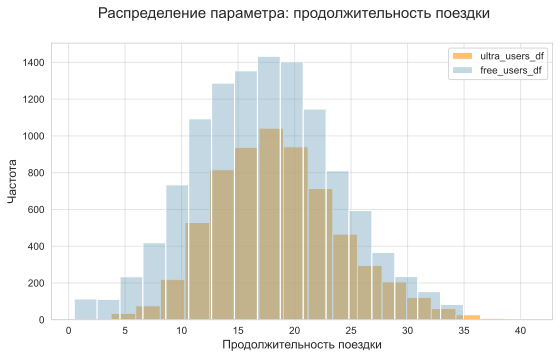

In [43]:
fig = plt.figure(figsize=(9, 5))
fig.suptitle('Распределение параметра: продолжительность поездки', fontsize=15)
ax1 = fig.add_subplot(1, 1, 1)
ax1.grid(which='major', linewidth=1, color='gray', alpha=0.2)
sns.histplot(x='duration', data=ultra_users_df, ax=ax1, color='#FFAC40', bins=17)
sns.histplot(x='duration', data=free_users_df, ax=ax1, color='#6B9FB8', alpha=0.4, bins=17)

plt.xlabel("Продолжительность поездки", fontsize=12)
plt.ylabel("Частота", fontsize=12)
ax1.legend(["ultra_users_df", "free_users_df"])

plt.show()
# вывод гистограмм распределения 

Средняя продолжительность сессии для двух групп - **18 мин.**, пользователи free и ultra показывают *схожее поведение*. Однако, график пользователей с подпиской ultra *сдвинут немного вправо*, есть длительные поездки больше 35 мин.

## Подсчёт выручки

In [44]:
users_and_rides_df['duration'] = np.ceil(users_and_rides_df['duration'])
# округление продолжительности поездок методом np.ceil()

In [45]:
users_and_rides_df.head()
# вывод первых 5 строк

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [46]:
users_and_rides_grouped = (users_and_rides_df
                                .groupby(['user_id', 'month'])
                                .agg(sum_duration=('duration', 'sum'), 
                                     count_rides=('duration', 'count'), 
                                     sum_distance=('distance', 'sum'), 
                                     minute_price=('minute_price', 'first'), 
                                     start_ride_price=('start_ride_price', 'first'), 
                                     subscription_fee=('subscription_fee', 'first'),
                                     subscription_type=('subscription_type', 'first'))
                          )
users_and_rides_grouped
# группировка данных по пользователям и месяцам

sum_duration  count_rides  sum_distance  minute_price  \
user_id month                                                          
1       1              42.0            2   7027.511294             6   
        4               7.0            1    754.159807             6   
        8              46.0            2   6723.470560             6   
        10             32.0            2   5809.911100             6   
        11             56.0            3   7003.499363             6   
...                     ...          ...           ...           ...   
1534    6              26.0            2   3409.468534             8   
        8              48.0            2   7622.453034             8   
        9              23.0            1   4928.173852             8   
        11             78.0            4  13350.015305             8   
        12             16.0            1   2371.711192             8   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
...                         ...               ...               ...  
1534    6                    50                 0              free  
        8                    50                 0              free  
        9                    50                 0              free  
        11                   50                 0              free  
        12                   50                 0              free  

[11331 rows x 7 columns]

In [47]:
users_and_rides_grouped['month_revenue'] = ((users_and_rides_grouped['start_ride_price'] * users_and_rides_grouped['count_rides']) 
                                            + (users_and_rides_grouped['minute_price'] * users_and_rides_grouped['sum_duration']) 
                                            + users_and_rides_grouped['subscription_fee']
                                           )
# подсчёт месячной выручки для каждого пользователя

In [48]:
users_and_rides_grouped.head()
# вывод первых 5 строк

sum_duration  count_rides  sum_distance  minute_price  \
user_id month                                                          
1       1              42.0            2   7027.511294             6   
        4               7.0            1    754.159807             6   
        8              46.0            2   6723.470560             6   
        10             32.0            2   5809.911100             6   
        11             56.0            3   7003.499363             6   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   

               month_revenue  
user_id month                 
1       1              451.0  
        4              241.0  
        8              475.0  
        10             391.0  
        11             535.0

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**H_0:** Продолжительность поездки (duration) пользователей *с подпиской* "Ультра" **равна** продолжительности поездки (duration) пользователей *без подписки*

**H_a:** Продолжительность поездки (duration) пользователей *с подпиской* "Ультра" **больше** продолжительности поездки (duration) пользователей *без подписки*

alpha = *0.05*

In [49]:
print(ultra_users_df['duration'].describe()['std'])
ultra_users_df['duration'].count()

5.572048329261361


6500

In [50]:
print(free_users_df['duration'].describe()['std'])
free_users_df['duration'].count()

6.326802859586479


11568

В данном случае будем использовать метод **.ttest_ind()** для сравнения средних двух генеральных совокупностей. Тест будет *односторонним*, так как в вопросе предполагается, что среднее значение первой генеральной совокупности больше среднего значения второй. Генеральные совокупности *не зависят друг от друга* и нет основания думать, что их дисперсии не равны, поэтому оставим параметр equal_var по умолчанию.

In [51]:
results = st.ttest_ind(list(ultra_users_df['duration']), list(free_users_df['duration']), alternative='greater')
alpha = 0.05
print(results.pvalue)
# вывод значения p-value на экран                         
if results.pvalue < alpha:
    print('«Отвергаем нулевую гипотезу»')                                    
else:
    print('«Не получилось отвергнуть нулевую гипотезу»')        
# условный оператор с выводом строки с ответом

1.2804098316645618e-34
«Отвергаем нулевую гипотезу»


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской ultra **тратят больше времени** на поездки.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

**H_0:** Среднее расстояние одной поездки (distance) пользователей *с подпиской* "Ультра" **= 3130 метров** 

**H_a:** Среднее расстояние одной поездки (distance) пользователей *с подпиской* "Ультра" **> 3130 метров** 

alpha = *0.05*

Используем метод **.ttest_1samp()**, в параметре alternative указываем 'greater' (альтернативная гипотеза *односторонняя*).

In [52]:
mean_value = 3130
alpha = 0.05
results = st.ttest_1samp(list(ultra_users_df['distance']), mean_value, alternative='greater')
print(results.pvalue)
# вывод значения p-value на экран                         
if results.pvalue < alpha:
    print('«Отвергаем нулевую гипотезу»')                                    
else:
    print('«Не получилось отвергнуть нулевую гипотезу»')        
# условный оператор с выводом строки с ответом

0.9195368847849785
«Не получилось отвергнуть нулевую гипотезу»


Полученное значение p-value больше заданного уровня значимости, поэтому мы не можем отвергнуть нулевую гипотезу. Значит, среднее **расстояние** за одну поездку, которое проезжают пользователи с подпиской ultra **не превышает 3130 метров**.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**H_0:** Помесячная выручка (month_revenue) от пользователей *с подпиской* "Ультра" **равна** помесячной выручке (month_revenue) пользователей *без подписки*

**H_a:** Помесячная выручка (month_revenue) от пользователей *с подпиской* "Ультра" **больше** помесячной выручки (month_revenue) пользователей *без подписки*

alpha = *0.05*

In [53]:
print(users_and_rides_grouped.query('subscription_type == "ultra"')['month_revenue'].describe()['std'])
users_and_rides_grouped.query('subscription_type == "ultra"')['month_revenue'].count()

88.26273694686293


4533

In [54]:
print(users_and_rides_grouped.query('subscription_type == "free"')['month_revenue'].describe()['std'])
users_and_rides_grouped.query('subscription_type == "free"')['month_revenue'].count()

183.86832978113245


6798

In [55]:
results = st.ttest_ind(list(users_and_rides_grouped.query('subscription_type == "ultra"')['month_revenue']), list(users_and_rides_grouped.query('subscription_type == "free"')['month_revenue']), alternative='greater')
alpha = 0.05
print(results.pvalue)
# вывод значения p-value на экран                         
if results.pvalue < alpha:
    print('«Отвергаем нулевую гипотезу»')                                    
else:
    print('«Не получилось отвергнуть нулевую гипотезу»')        
# условный оператор с выводом строки с ответом

1.8850394384715216e-31
«Отвергаем нулевую гипотезу»


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что **помесячная выручка** от пользователей с подпиской ultra **выше**, чем выручка от пользователей без подписки.

## Итоговый вывод

Нам были предоставлены данные о пользователях сервиса GoFast вместе с информацией о поездках (продолжительности сессий, расстояниях, датах поездок) и типах подписки ultra и free. 

На первом этапе мы выполнили предобработку данных: удалили полные явные дубликаты, проверили наличие пропусков, преобразовали тип данных в колонке с датами и дополнительно создали новый столбец с номерами месяцев. Далее был проведён исследовательский анализ данных и подсчитана месячная выручка для каждого пользователя. В конце проверили ряд гипотез о поведении пользователей с подпиской.

В исследовательской части мы выяснили, что больше всего пользователей сервиса проживает в *Пятигорске (219 человек) и Екатеринбурге (204 человека)*, меньше всего - в Москве (168 человек). Процент пользователей с подпиской ultra в нашей выборке 45.6%. Их доля высока в *Москве и Омске* (по 50% с подпиской) благодаря развитой инфраструктуре и из-за частых пробок. На последнем месте находится Краснодар: доля клиентов с подпиской ultra составляет 42%. Чаще всего сервисом пользуются молодые люди **от 18 до 28 лет**. Среднее расстояние, которое проезжают пользователи на самокатах, равно **3 км.**, причём этот показатель характерен для обеих групп клиентов ultra и free. Помимо этого, есть короткие поездки в радиусе 700 м. и длинные от 5 км. Количество таких поездок больше у пользователей без подписки. **18 мин.** - средняя продолжительность поездки, клиенты с *ultra* предпочитают также и более длительные поездки, *больше 35 мин*.

Исходя из результатов проведённых статистических тестов, можно сделать вывод, что пользователи с подпиской **ultra** являются *более выгодными* для компании. *Продолжительсность* их поездок значимо *дольше*, чем у клиентов без подписки. Также *помесячная выручка* от таких клиентов значимо *выше*, чем выручка от пользователей без подписки. При этом среднее расстояние за одну поездку у клиентов ultra *не превышает 3130 метров*. Значит, в будущем следует подробнее изучить причины долгой продолжительности сессий у пользователей ultra (возможно они делают более длительные остановки по пути) и выявить потенциальные точки роста выручки. Кроме того, можно попробовать привлечь больше пользователей в городах с небольшой долей подписок с помощью внедрения новых тарифов с кешбэком, балами за поездки или с дополнительной страховкой при аварии.